In [26]:
# Importing required modules
%tensorflow_version 2.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow is already loaded. Please restart the runtime to change versions.


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!unzip /content/drive/MyDrive/img.zip

Streaming output truncated to the last 5000 lines.
   creating: img/WOMEN/Tees_Tanks/id_00005020/
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_7_additional.jpg  
   creating: img/WOMEN/Tees_Tanks/id_00005033/
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_4_full.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_6_flat.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_4_full.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_000

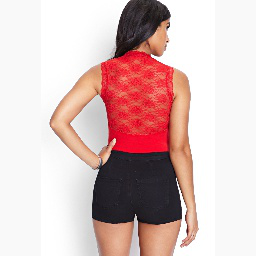

In [39]:
# Printing a particular image
image1 = tf.keras.preprocessing.image.load_img('img/WOMEN/Tees_Tanks/id_00007575/05_3_back.jpg')
image1


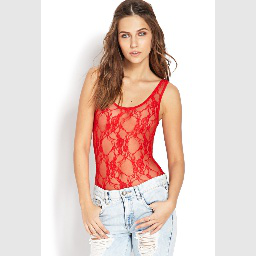

In [14]:
# Printing a particular image
image2 = tf.keras.preprocessing.image.load_img('img/WOMEN/Tees_Tanks/id_00005033/06_1_front.jpg')
image2

In [22]:
# creating a path to MEN's folder in img and saving it to imagepathM, printing the classes in the folder MEN which is the types of clothing in the dataset. Also printing the total number of pictures in MEN.
imagepathM = os.path.join("img/MEN")
classesM = os.listdir(imagepathM)
countM = 0
for c in classesM:
    countM = countM+len(os.listdir(imagepathM+"/"+c))
print(countM)
print(classesM)


951
['Pants', 'Sweaters', 'Denim', 'Jackets_Vests', 'Shirts_Polos', 'Suiting', 'Tees_Tanks', 'Sweatshirts_Hoodies', 'Shorts']


In [23]:
#creating a path to WOMEN's folder in img and saving it to imagepathW, printing the classes in the folder WOMEN which is the types of clothing in the dataset. Also printing the total number of pictures in WOMEN.
imagepathW = os.path.join("img/WOMEN")
classesW = os.listdir(imagepathW)
countW = 0
for c in classesW:
    countW = countW+len(os.listdir(imagepathW+"/"+c))
print(countW)
print(classesW)


7131
['Pants', 'Sweaters', 'Jackets_Coats', 'Denim', 'Skirts', 'Leggings', 'Graphic_Tees', 'Blouses_Shirts', 'Dresses', 'Cardigans', 'Tees_Tanks', 'Sweatshirts_Hoodies', 'Shorts', 'Rompers_Jumpsuits']


In [28]:
#ImageDataGenerator Generate batches of tensor image data with real-time data augmentation.
train = ImageDataGenerator(rescale = 1./255.,rotation_range = 20,width_shift_range = 0.2, height_shift_range = 0.2,horizontal_flip = True)
traindata = train.flow_from_directory('/content/img/' , target_size=(150, 150), batch_size = 64, class_mode = "categorical" , classes  = ['MEN','WOMEN'],shuffle = True,)

Found 52712 images belonging to 2 classes.


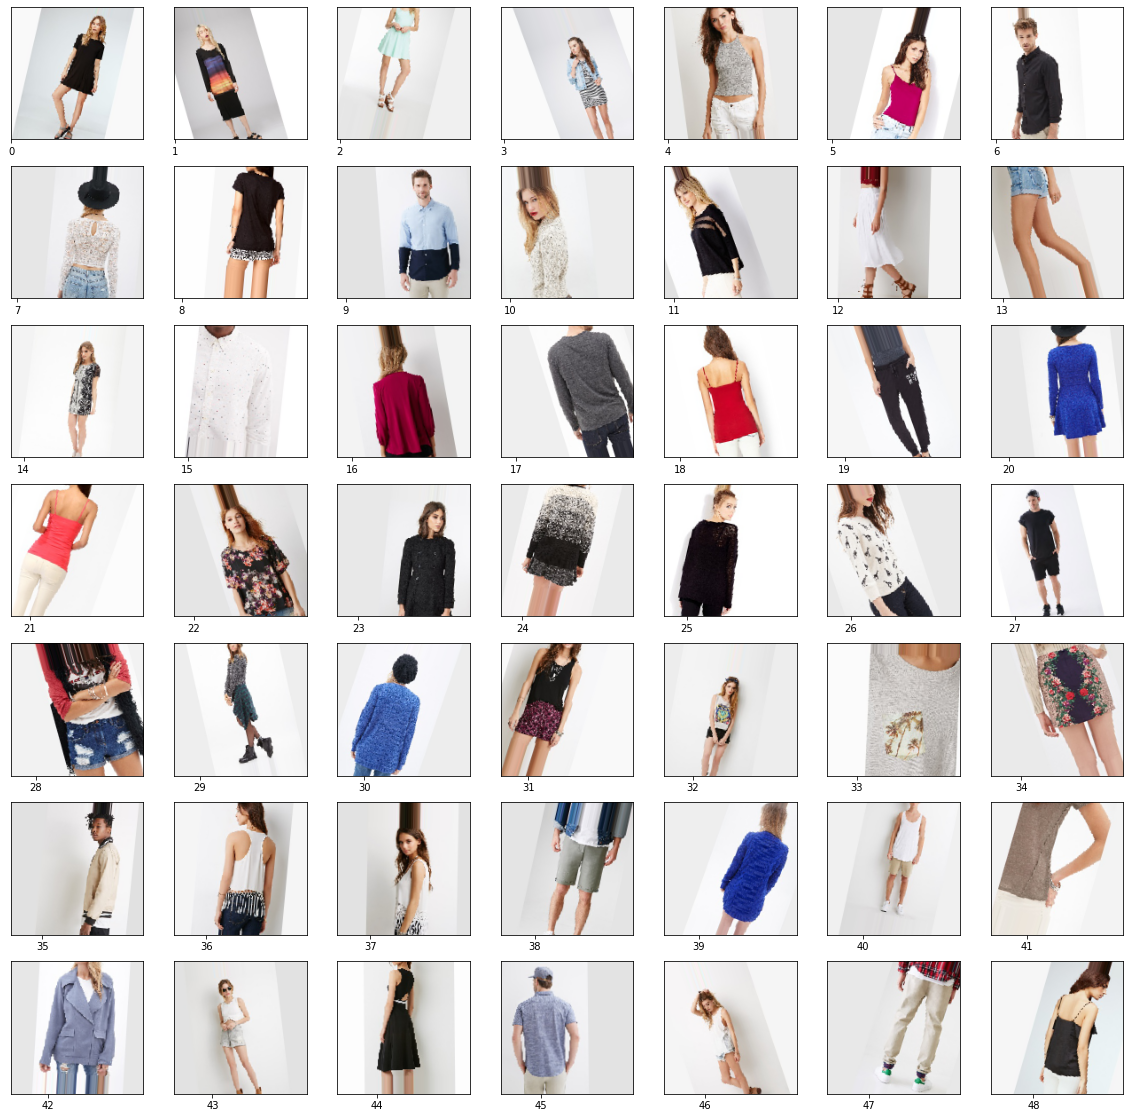

In [41]:
# selecting ad printing 49 random images in a 7x7 grid
x_img, y_img = next(traindata)
plt.figure(figsize=(20,20))
random_inds = np.random.choice(60000,49)
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([i])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(x_img[i])

   